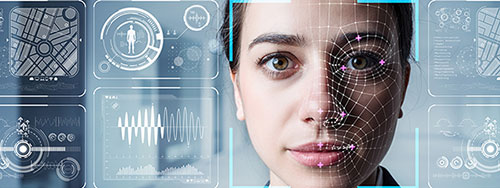

# **SISTEM PAKAR BIOMETRIK WAJAH**

Sistem ini di gunakan para ahli data (data scientist) untuk mengidentifikasi wajah seseorang secara digital dengan perhitungan Metrix.

> Penggunaan IKD (Kartu Identitas Digital)

In [ ]:
pip install opencv-python matplotlib mediapipe numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 64.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

import mediapipe as mp

<ipython-input-3-a46a4bec3ee9>:30: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 6


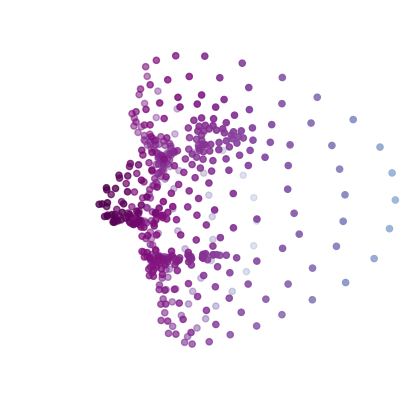

In [ ]:
def get_facemesh_coords(landmark_list, img):
    """Extract FaceMesh landmark coordinates into 468x3 NumPy array.
    """
    h, w = img.shape[:2]
    xyz = [(lm.x, lm.y, lm.z) for lm in landmark_list.landmark]

    return np.multiply(xyz, [w, h, w]).astype(int)

image = cv2.imread("/content/prab.jpg")  # Foto Capture Wajah


# Algoritma Biometrik Wajah
with mp.solutions.face_mesh.FaceMesh(static_image_mode=True,
                                     refine_landmarks=False,
                                     max_num_faces=1,
                                     min_detection_confidence=0.5
                                     ) as face_mesh:

    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

coords = get_facemesh_coords(results.multi_face_landmarks[0], image)



fig = plt.figure(figsize=[4, 4])
ax = fig.add_axes([0, 0, 1, 1], projection='3d')
ax.scatter(coords[:, 0], coords[:, 2], -coords[:, 1], c=coords[:, 2],
           cmap="BuPu_r", clip_on=False, vmax=2*coords[:, 2].max())
ax.elev = -5
ax.dist = 6
ax.axis("off")


xlim = ax.get_xlim()
ylim = ax.get_ylim()
zlim = ax.get_zlim()

max_range = np.array([np.diff(xlim), np.diff(ylim), np.diff(zlim)]).max() / 2.0

mid_x = np.mean(xlim)
mid_y = np.mean(ylim)
mid_z = np.mean(zlim)
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

# Menbuat Animasi Biometrik Wajah
def rotate_view(frame, azim_delta=1):
    ax.azim = -20 - azim_delta * frame
animation = FuncAnimation(fig, rotate_view, frames=360, interval=15)

writer = PillowWriter(fps=15)
animation.save("facebiometric_coordinates.gif", writer=writer, dpi=72)

# Animasi Biometrik 3D tersimpan di menu Files (File Browser/Path)